In [94]:
# these libraries are useful to calculate  the matrix and statistical operations
import numpy as np
from scipy.stats import norm
from scipy import stats

# these librairies
import pandas as pd
from pandas import Series,DataFrame


# these libraries are usefull for visualisation purpose
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# ignoring the warning popups
import warnings
warnings.filterwarnings('ignore')

#Supervised learning classification model & metrics
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn import metrics

# these libraries are usefull for textprocessing(conversion) in this file
import nltk
import gensim

# text mining cleaning libraries
from nltk.corpus import stopwords
from itertools import combinations
from gensim import corpora, models
from nltk.stem import PorterStemmer

# this libraries are usefull for baggig Analysis
from wordcloud import WordCloud

#
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel

# these libraries are usefull for sentiment analysis
from nltk.sentiment import SentimentIntensityAnalyzer

#this library is usefull for tweetData Scraping
import tweepy

#these libraries are usefull for webScraping
import selenium
from selenium import webdriver
from bs4 import BeautifulSoup
import requests

# it is distance metric or similarity merics
from sklearn.metrics.pairwise import cosine_similarity

#text summarization 
from sumy.summarizers.lex_rank import LexRankSummarizer
from sumy.nlp.stemmers import Stemmer
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer

from nltk.corpus import stopwords
from itertools import combinations
from gensim import corpora, models

# Sentiment Analysis-Supervised + Unsupervised model

In [95]:
df1=pd.read_csv('spam.csv',encoding='cp1252')

In [96]:
df1.head()

,label,text
0,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ..."
2,NaN,NaN
3,ham,Ok lar... Joking wif u oni...
4,NaN,NaN


In [97]:
df1=df1.dropna()

In [98]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 1 to 11143
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 130.6+ KB


In [99]:
docs = df1['text']
docs = docs.str.lower()
docs = docs.str.replace('[^a-z#@ ]', '')
docs = docs.str.split(' ')
words_rows = docs.tolist()
hashtags = []
for row in words_rows:
    row_hashtags = [word for word in row if word.startswith('#')]
    hashtags.extend(row_hashtags)
top_hashtags = pd.Series(hashtags).value_counts().head()
top_hashtags

#    9
dtype: int64

In [100]:
 pd.Series(hashtags)

0    #
1    #
2    #
3    #
4    #
5    #
6    #
7    #
8    #
dtype: object

# APPLY CLEANNING 

In [101]:


# converting the text data in lowercase letter
lower_case_sentences=df1['text'].str.lower().str.replace('[^a-z ]','')

# creating the stopwords 
import nltk
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend([])# if u want to add extra list of words in stopword add the elements in  empty list

#creating the stemmer it process the words like playing,plays,play into play 
stemmer=nltk.stem.PorterStemmer()


def clean_sentences(text):
    words=text.split(' ')# it split sentences into words where white spaces appears(all sentences at a time)
    word_clean=[stemmer.stem(word) for word in words if word not in stopwords]
#for each word in each sentence is not in stopwords is applying stemming then assign to word_clean
    text_clean=' '.join(word_clean)#retrain the words into respective sentences
    return text_clean

# produce the clean text  such as in text data removes stopwords,applying stemmer
docs_clean=lower_case_sentences.apply(clean_sentences)

    

# Creating Doccument term Matrix

In [102]:
model_dtm = CountVectorizer()
sparse_matrix = model_dtm.fit_transform(docs_clean)
dtm = pd.DataFrame(sparse_matrix.toarray(),columns=model_dtm.get_feature_names())
dtm.shape

(5572, 7055)

In [103]:
dtm.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
sparse_matrix

<5572x7055 sparse matrix of type '<class 'numpy.int64'>'
	with 45070 stored elements in Compressed Sparse Row format>

In [105]:
5572 * 7055 #(no. of rows x no. of columns)
45070 / (5572 * 7055 ) * 100 #Percentage of non zero elements

0.11465141847742306

In [106]:
sparse_matrix.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [107]:
model_dtm.get_feature_names()[:5]

['aa', 'aah', 'aaniy', 'aaooooright', 'aathilov']

In [108]:
dtm.sum()

aa              1
aah             3
aaniy           1
aaooooright     1
aathilov        3
aathiwher       3
ab              1
abbey           1
abdomen         1
abeg            1
abel            1
aberdeen        1
abi             4
abil            2
abiola         11
abj             2
abl            26
abnorm          1
abouta          1
abroad          1
absenc          1
absolut         1
abstract        1
abt            26
abta            3
aburo           2
abus            2
ac              4
academ          2
acc             4
               ..
yovil           1
yowif           1
yoyyooo         1
yr             29
ystrdayic       1
yt              1
yummi           3
yummmm          1
yun             5
yunni           2
yuo             4
yuou            1
yup            43
yupz            1
ywhere          1
zac             1
zaher           1
zealand         1
zebra           1
zed             6
zero            1
zf              1
zhong           1
zindgi          1
zoe       

In [109]:
dtm.sum().sort_values(ascending=False).head(20)

call    656
im      475
go      453
get     451
ur      384
come    297
dont    290
free    278
ok      277
ltgt    276
know    270
day     255
like    255
love    244
ill     243
want    243
time    239
got     239
good    235
text    225
dtype: int64

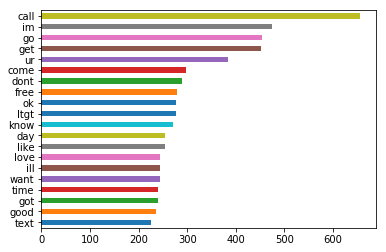

In [110]:
dtm.sum().sort_values(ascending=False).head(20)[::-1].plot.barh()
plt.show()

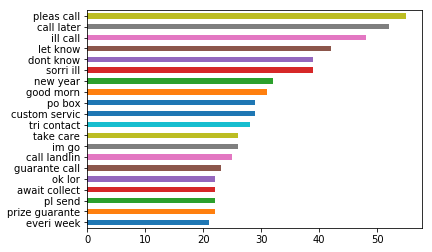

In [111]:
model2 = CountVectorizer(ngram_range=(2,2))
sparse_matrix2 = model2.fit_transform(docs_clean)
dtm2 = pd.DataFrame(sparse_matrix2.toarray(),
                   columns=model2.get_feature_names())
#print(dtm.shape)
#dtm2.head()
dtm2.sum().sort_values(ascending=False).head(20)[::-1].plot.barh() # top 20 bigrams

# cosine similarity

In [112]:
from sklearn.metrics.pairwise import cosine_similarity
cos_matrix = pd.DataFrame(cosine_similarity(dtm.T),columns = dtm.columns,index= dtm.columns)
cos_matrix.head()

,aa,aah,aaniy,aaooooright,aathilov,aathiwher,ab,abbey,abdomen,abeg,...,zero,zf,zhong,zindgi,zoe,zogtoriu,zoom,zouk,zs,zyada
aa,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aah,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaniy,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aaooooright,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
aathilov,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [113]:
cosine_similarity([dtm['aa'], dtm['aah']])

array([[1., 0.],
       [0., 1.]])

In [114]:
cosine_similarity([dtm['aa'], dtm['aah']])[0][1]

0.0

In [115]:
word = 'aa'
cos_matrix[word].sort_values(ascending=False).drop(word)

limp          1.000000
exhaust       0.447214
er            0.408248
hang          0.408248
slowli        0.277350
follow        0.242536
quit          0.160128
plan          0.131306
hello         0.117851
didnt         0.108465
thing         0.085126
home          0.077615
go            0.043396
goin          0.000000
godyou        0.000000
godtaken      0.000000
goe           0.000000
goggl         0.000000
goigng        0.000000
gong          0.000000
gold          0.000000
goinb         0.000000
gokila        0.000000
goneu         0.000000
godid         0.000000
golddigg      0.000000
golden        0.000000
goldvik       0.000000
golf          0.000000
gon           0.000000
                ...   
promin        0.000000
promis        0.000000
problemat     0.000000
problem       0.000000
probabl       0.000000
prob          0.000000
prey          0.000000
price         0.000000
priceso       0.000000
pride         0.000000
priest        0.000000
prin          0.000000
princ      

In [116]:
def get_similar_words(input_term):
    df_cs = pd.DataFrame(columns=['input_term', 'term', 'cs'])
    for word in dtm.columns:
        cs = cosine_similarity([dtm[word], dtm[input_term]])[0][1]
        df_cs = df_cs.append({'input_term': input_term,
                              'term': word,
                              'cs': cs}, ignore_index=True)
    df_cs = df_cs.sort_values(by='cs', ascending=False)
    df_cs = df_cs[df_cs['input_term'] != df_cs['term']].head(10)
    return df_cs['term'].values

get_similar_words('aa')

array(['limp', 'exhaust', 'hang', 'er', 'slowli', 'follow', 'quit',
       'plan', 'hello', 'didnt'], dtype=object)

# train test split

In [117]:
from sklearn.model_selection import train_test_split
train_x, test_x = train_test_split(dtm, test_size=0.2, random_state=0)
train_y = df1.iloc[train_x.index]['label']
test_y = df1.iloc[test_x.index]['label']

In [118]:
train_x.shape

(4457, 7055)

In [119]:
test_x.shape

(1115, 7055)

In [120]:
train_y.shape

(4457,)

In [121]:
test_y.shape

(1115,)

# Supervised model

In [122]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier()
model_rf.fit(train_x, train_y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

# prediction

In [123]:
test_y_rf = model_rf.predict(test_x)

# Evaluating

In [124]:
from sklearn import metrics
print(metrics.classification_report(test_y ,test_y_rf))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       949
        spam       0.99      0.77      0.86       166

   micro avg       0.96      0.96      0.96      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.96      0.96      1115



# Unsupervised model

# Vader

In [125]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [126]:
senti = SentimentIntensityAnalyzer()

In [127]:
senti.polarity_scores('i love india')

{'neg': 0.0, 'neu': 0.192, 'pos': 0.808, 'compound': 0.6369}

# Unsupervised model

In [129]:
# we are using compound so range is +1 to -1

In [130]:
df1['sentiment_vader'] = df1['text'].apply(lambda v: senti.polarity_scores(v)['compound'])

def assign_sentiment(v):
    if v > 0:
        return 'ham'
    else:
        return 'spam'
df1['sentiment_vader'] = df1['sentiment_vader'].apply(assign_sentiment)
df1['sentiment_vader'].value_counts()

spam    2894
ham     2678
Name: sentiment_vader, dtype: int64

In [131]:
df1.head()


,label,text,sentiment_vader
1,ham,"Go until jurong point, crazy.. Available only ...",ham
3,ham,Ok lar... Joking wif u oni...,ham
5,spam,Free entry in 2 a wkly comp to win FA Cup fina...,ham
7,ham,U dun say so early hor... U c already then say...,spam
9,ham,"Nah I don't think he goes to usf, he lives aro...",spam


# Evaluating

In [81]:
from sklearn import metrics
print(metrics.classification_report(df1['label'],df1['sentiment_vader']))

              precision    recall  f1-score   support

         ham       0.80      0.44      0.57      4825
        spam       0.07      0.27      0.11       747

   micro avg       0.42      0.42      0.42      5572
   macro avg       0.43      0.35      0.34      5572
weighted avg       0.70      0.42      0.51      5572



# Topic Modelling

In [140]:
#cleanining is seperate from others sentiment analysis

In [134]:
docs=df1['text'].fillna("").str.lower().str.replace('[^a-z ]','')
docs.head()

1    go until jurong point crazy available only in ...
3                              ok lar joking wif u oni
5    free entry in  a wkly comp to win fa cup final...
7          u dun say so early hor u c already then say
9    nah i dont think he goes to usf he lives aroun...
Name: text, dtype: object

In [135]:
stopwords=nltk.corpus.stopwords.words('english')
stopwords.extend(["",'use','will','one','good'])
stemmer=nltk.stem.PorterStemmer()
docs_clean=[]
for doc in docs:
    words=doc.split(' ')
    words_clean=[stemmer.stem(word) for word  in words if word not in stopwords]
    docs_clean.append(words_clean)

In [146]:
docs_clean[:1]

[['go',
  'jurong',
  'point',
  'crazi',
  'avail',
  'bugi',
  'n',
  'great',
  'world',
  'la',
  'e',
  'buffet',
  'cine',
  'got',
  'amor',
  'wat']]

In [141]:
dictionary=gensim.corpora.Dictionary(docs_clean)

In [142]:
dictionary.token2id['aa']

6552

In [143]:
list(zip(dictionary.keys(),dictionary.values()))[:1]

[(0, 'amor')]

# Bag of words

In [147]:
docs_bow=[]
for doc in docs_clean:
    bow= dictionary.doc2bow(doc)
    docs_bow.append(bow)

In [148]:
dictionary.doc2bow(docs_clean[0])# this only for a doccument

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [149]:
docs_bow[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

In [150]:
import numpy as np
np.array(docs_bow).shape

(5572,)

# Topic Modelling using LDA¶

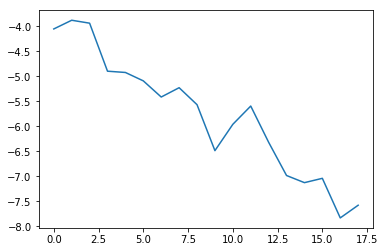

In [151]:
from gensim.models.coherencemodel import CoherenceModel
c_scores=[]
for i in range(2,20):
    model=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=i,random_state=100)
    coher_model=CoherenceModel(model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)
plt.plot(c_scores)

In [152]:
coher_model.get_coherence_per_topic()

[-6.0561552353537484,
 -8.661282358153983,
 -5.865885495916879,
 -5.577241358043555,
 -9.55347933972718,
 -6.004151860393371,
 -9.580258838574,
 -8.068405307012858,
 -12.099834141598134,
 -7.088954578284005,
 -7.907178988563164,
 -13.71743567644067,
 -5.707342275052772,
 -6.856954228806492,
 -10.79896756887943,
 -5.562411292017494,
 -5.499264333613002,
 -3.946093952573118,
 -5.387042873547599]

In [153]:
coher_model.get_coherence()

-7.5757020896079705

In [154]:
lda_model=gensim.models.LdaModel(docs_bow,id2word=dictionary,num_topics=3,random_state=100,iterations=500)

In [156]:
lda_model.print_topics()

[(0,
  '0.041*"u" + 0.013*"call" + 0.009*"go" + 0.008*"want" + 0.008*"ur" + 0.006*"n" + 0.006*"time" + 0.006*"r" + 0.005*"get" + 0.005*"need"'),
 (1,
  '0.014*"call" + 0.012*"im" + 0.012*"get" + 0.010*"ill" + 0.009*"ltgt" + 0.008*"u" + 0.008*"know" + 0.006*"come" + 0.006*"dont" + 0.006*"send"'),
 (2,
  '0.014*"u" + 0.013*"ok" + 0.011*"im" + 0.010*"ur" + 0.010*"go" + 0.010*"call" + 0.008*"love" + 0.007*"get" + 0.007*"da" + 0.006*"stop"')]

In [155]:
lda_model.get_document_topics(docs_bow)

# Topics distribution for each document

In [162]:
lda_model.get_document_topics(docs_bow[1])

[(0, 0.1501815), (1, 0.054247525), (2, 0.79557097)]

In [158]:
pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topic','prob']).sort_values(by='prob')

,topic,prob
1,1,0.054253
0,0,0.150061
2,2,0.795686


In [157]:
pd.DataFrame(lda_model.get_document_topics(docs_bow[1]),columns=['topic','prob']).sort_values(by='prob').iloc[-1]['topic']

2.0

In [159]:
pd.DataFrame(lda_model.get_document_topics(docs_bow[2]),columns=['topic','prob']).sort_values(by='prob')

,topic,prob
1,1,0.016594
0,0,0.016737
2,2,0.966669


In [161]:
pd.DataFrame(lda_model.get_document_topics(docs_bow[2]),columns=['topic','prob']).sort_values(by='prob').iloc[-1]['topic']

2.0

# Assign topic to each document based on probability

In [169]:
df1['topics'] = [lda_model.get_document_topics(dictionary.doc2bow(text))[0][0] for text in docs_clean]

In [170]:
df1['topics'].value_counts()

0    5567
1       5
Name: topics, dtype: int64

# Shotcut method

In [178]:
import re
import nltk
import gensim
import numpy as np
import pandas as pd
from nltk.corpus import stopwords
from itertools import combinations
from gensim import corpora, models

In [182]:
#getting stopwords

In [179]:
common_stop_words = nltk.corpus.stopwords.words('english')
custom_stop_words = []
all_stop_words = np.hstack([common_stop_words, custom_stop_words])

all_stop_words[:5]

array(['i', 'me', 'my', 'myself', 'we'], dtype='<U32')

In [ ]:
#clean the words

In [180]:
def clean_review(review_text):
    words_clean = (re.sub('[^a-z ]', '', review_text.lower()).split())
    words_imp = np.setdiff1d(words_clean, all_stop_words)
    return words_imp


In [181]:

texts = []
for review_text in df1['text'].dropna().values:
    words_token = clean_review(review_text)
    texts.append(list(words_token))

In [ ]:
#Tokens to IDs

In [183]:
dictionary = corpora.Dictionary(texts)

In [184]:
#Bag of words

In [185]:
corpus = [dictionary.doc2bow(text) for text in texts]

In [186]:
corpus[0]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 1),
 (15, 1)]

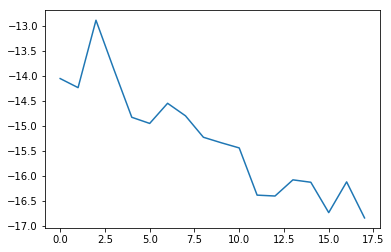

In [198]:
from gensim.models.coherencemodel import CoherenceModel
c_scores=[]
for i in range(2,20):
    model=gensim.models.LdaModel(corpus,id2word=dictionary,num_topics=i,random_state=100)
    coher_model=CoherenceModel(model,corpus=docs_bow,coherence='u_mass')
    score=coher_model.get_coherence()
    c_scores.append(score)
plt.plot(c_scores)

In [188]:
lda = models.LdaModel(corpus, id2word=dictionary, num_topics=3,random_state=100,iterations=500)
lda.print_topics()

[(0,
  '0.020*"u" + 0.009*"im" + 0.008*"good" + 0.007*"know" + 0.007*"love" + 0.006*"day" + 0.006*"dont" + 0.006*"get" + 0.005*"call" + 0.005*"got"'),
 (1,
  '0.013*"call" + 0.011*"free" + 0.011*"get" + 0.010*"u" + 0.009*"ltgt" + 0.006*"txt" + 0.006*"stop" + 0.006*"reply" + 0.005*"send" + 0.005*"ur"'),
 (2,
  '0.014*"u" + 0.013*"im" + 0.012*"call" + 0.010*"ok" + 0.010*"ill" + 0.008*"home" + 0.007*"come" + 0.006*"ur" + 0.006*"later" + 0.006*"go"')]

In [189]:
lda.get_document_topics(dictionary.doc2bow(texts[0]))

[(0, 0.66563195), (1, 0.023065945), (2, 0.31130213)]

In [ ]:
#Assign topic to each document based on probability

In [197]:
df1['topics'] = [lda.get_document_topics(dictionary.doc2bow(text))[0][0] for text in texts]

In [ ]:
#Topic distribution in reviews

In [193]:
df1['topics'].value_counts()

0    5572
Name: topics, dtype: int64